In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# BMI (Индекс массы тела) Dataset from https://www.kaggle.com/datasets/yasserh/bmidataset

# take only Height
df = pd.read_csv('bmi.csv')[['Height']]
df.shape

# # Используем искуственный
# df = np.random.normal(loc=170, scale=10, size=1000)
# df = pd.DataFrame(df, columns=['Height']).round()

(500, 1)

In [50]:
df.head(3)

,Height
0,174
1,189
2,185


### 

In [51]:
min_value = df['Height'].min()
max_value = df['Height'].max()
Ex = df['Height'].mean()
min_value, max_value, Ex

(140, 199, 169.944)

<Axes: >

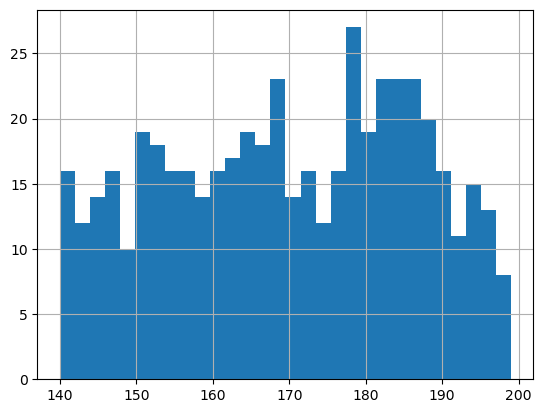

In [61]:
df['Height'].hist(bins=30)

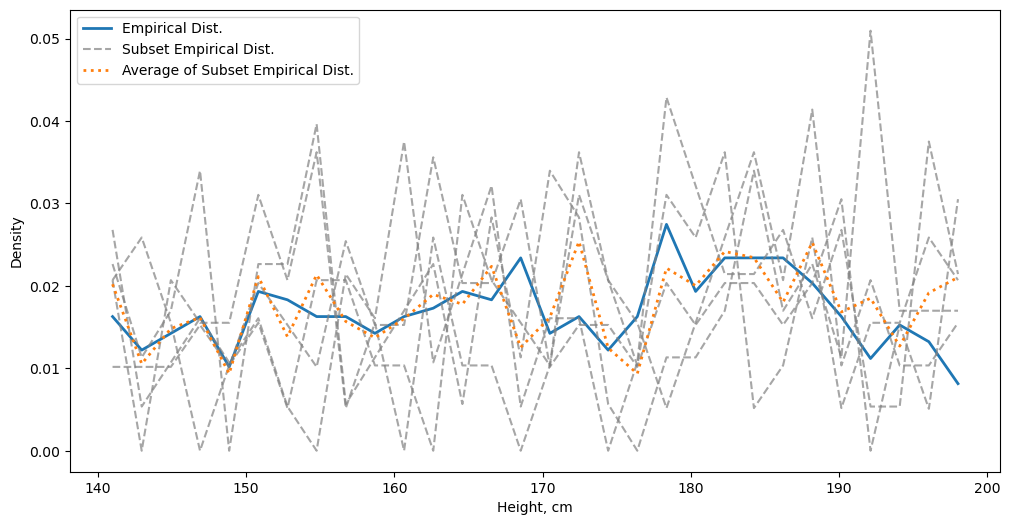

In [64]:
heights = df['Height']

# Split dataset ito smaller parts
partitions = np.array_split(np.random.permutation(heights), 5)

# Empirical distribution for each subset
subset_distributions = []
for part in partitions:
#     display(np.histogram(part, bins=30))
    counts_part, _ = np.histogram(part, bins=30, density=True)
    subset_distributions.append(counts_part)

# average distribution
average_distribution = np.mean(subset_distributions, axis=0)

plt.figure(figsize=(12, 6))

plt.plot(bin_centers, counts, label="Empirical Dist.", linewidth=2)

# Plot each subset
for i, subset_dist in enumerate(subset_distributions):
    plt.plot(bin_centers, subset_dist, color="grey", alpha=0.7, linestyle="--", label=f"Subset Empirical Dist." if i == 0 else "")

# Plot the average distribution
plt.plot(bin_centers, average_distribution, label="Average of Subset Empirical Dist.", linewidth=2, linestyle=':')


plt.xlabel("Height, cm")
plt.ylabel("Density")
plt.legend()
plt.show()